In [1]:
#Importing Libraries and Loading the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('IRIS.csv')


In [3]:
print(data.head(6))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa


In [4]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
X = pd.DataFrame(data)
num_columns = len(X.columns)
num_rows = (num_columns + 1) // 2
num_cols = 2


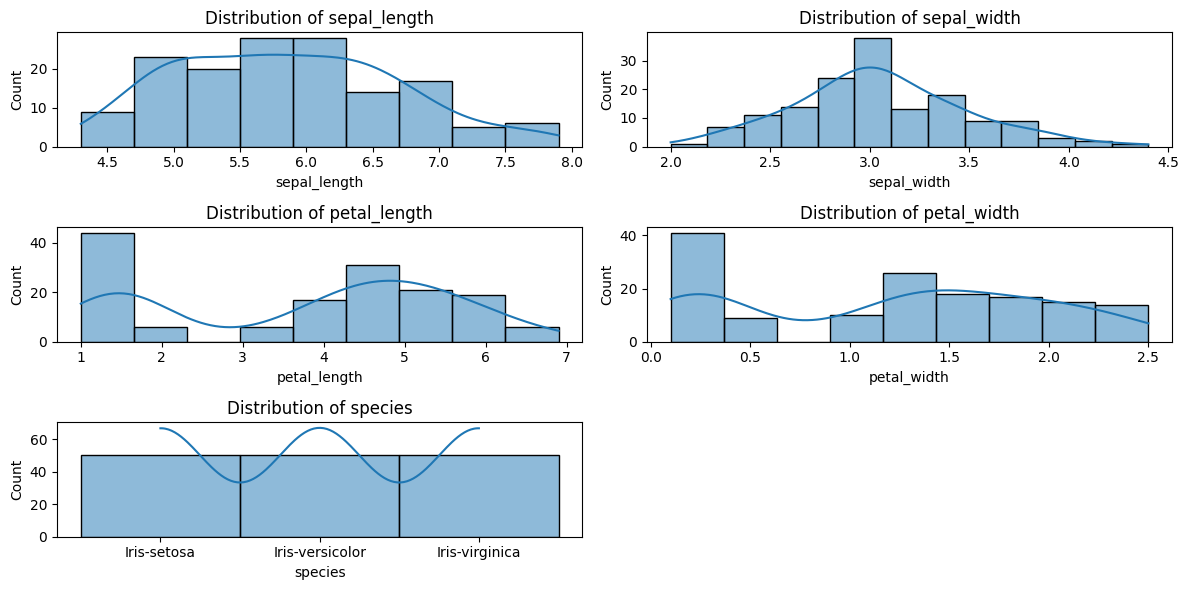

In [9]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [11]:
#Split Data and Feature Scaling
X = data.drop('species', axis=1)
y = data['species']


In [14]:

train_x, X_test, train_y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
X_test = scaler.transform(X_test)
#Train the Model and Evaluate
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(train_x, train_y)
SVC(kernel='linear')


# Evaluate the model
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

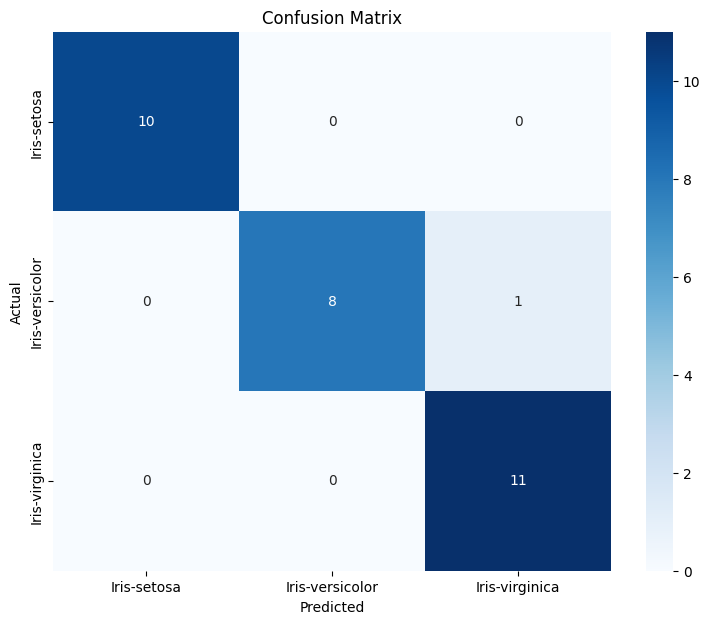

In [16]:
# Create a heatmap 
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()